# Generation of capacity curves using point dispersion
This notebook can be used to generate many synthethic capacity curves (spectral acceleration versus spectrum displacement), starting from a median pushover curve and dispersion levels for a number of specific points on the capacity curve. The figure below presents a number of capacity curves generated from a median curve representative of a given building typology.

<img src="../../../../figures/capacity_curves_dispersion.png" width="350" align="middle">

**Note**: To run the code in a cell:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

In [3]:
import point_dispersion as pd
from rmtk.vulnerability.common import utils
%matplotlib inline 

---
### Capacity curve generator
* The various points of the capacity curve should be defined in the vectors `Sa` (spectral acceleration) and `Sd` (spectral displacement).
* For each of these points, the variability is specified in the form of coefficients of variation, using the vectors `Sa_cov` and `Sd_cov`.
* The `distribution` can be set to "normal" or "lognormal" and controls the distribution used for the sampling.
* The parameters `Sa_corr`, `Sd_corr`, and `Sa_Sd_corr` control the correlation used for sampling points on. A correlation factor equal to 1.0 implies full correlation, whereas a value equal to 0.0 will lead to an independent sampling process.
* The parameter `truncation_level` specifies the number of standard deviations on either side of the mean of the distribution that will be considered during the sampling process.
* The number of capacity curves that will be generated is specified by the parameter `no_capacity_curves`.

Actual correlation in Sa: 0.999965716406
Actual correlation in Sd: 0.999967784735
Actual correlation between Sa and Sd: 0.277262748337


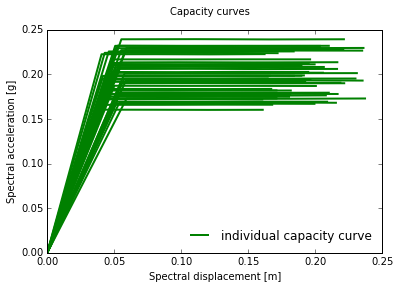

In [5]:
Sa_means = [0.20, 0.20, 0.20, 0.20]
Sa_covs  = [0.20, 0.20, 0.20, 0.20]
Sd_means = [0.05, 0.10, 0.15, 0.20]
Sd_covs  = [0.20, 0.20, 0.20, 0.20]
distribution = "normal"
Sa_corr = 0.99999
Sd_corr = 0.99999
Sa_Sd_corr = 0.5
truncation_level = 1
no_capacity_curves = 50
capacity_curves = pd.generate_capacity_curves(Sa_means, Sa_covs, Sd_means, Sd_covs,
                                              distribution, no_capacity_curves, 
                                              Sa_corr, Sd_corr, Sa_Sd_corr, truncation_level)
utils.plot_capacity_curves(capacity_curves)

### Include additional information
Additional information can be added to the capacity curves generated using the above method. 

After generating the required capacity curves by running the cells above, you can add the following information to the capacity curves:

* The parameter `gamma` defines the modal participation factor
* The parameter `height` defines the height of the structure
* The parameter `elastic_period` defines the elastic period of the first mode of vibration
* The parameter `yielding_point_index` defines the yielding point

In [10]:
gamma = 1.2
height = 3.0
elastic_period = 0.6
yielding_point_index = 1
capacity_curves = utils.add_information(capacity_curves, 'gamma', 'value', gamma)
capacity_curves = utils.add_information(capacity_curves, 'heights', 'value', height)
capacity_curves = utils.add_information(capacity_curves, 'periods', 'value', elastic_period)
capacity_curves = utils.add_information(capacity_curves, 'yielding point', 'point', yielding_point_index)

### Save capacity curves
Please specify below the path for the output file to save the capacity curves:

In [11]:
output_file = "../../../../../rmtk_data/capacity_curves_point.csv"
utils.save_SdSa_capacity_curves(capacity_curves, output_file)